# Part II - Factors that determine the points a team gets over a season in Europe's top flight leagues 
## by Omasan Akperi

## Investigation Overview

> For my presentation, I would focus on the factors that affect the points a team gets such as wins, goals scored, and passes made close to the opposition goal and I would also visualize the characteristics of passes made close to the opposition goal in the different leagues and at different times. 

## Dataset Overview

> This dataset contains the points that each team in the top 6 leagues in Europe got between 2014 and 2019 and other metrics of the teams in the top flight in that period. The data was gotten from kaggle (https://www.kaggle.com/datasets/slehkyi/extended-football-stats-for-european-leagues-xg). Some columns are dropped because they were not used in the analysis, while some features were engineered.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('understat.com.csv')

In [3]:
# engineering some features and dropping some columns
df.rename(columns = {'missed':'conceded', 'deep':'passes', 'deep_allowed':'passes_allowed'}, inplace = True)
df['pts_per_match'] = df['pts']/df['matches']
df['passes_per_match'] = df['passes']/df['matches']
df=df.drop(['xGA', 'xGA_diff', 'npxGA', 'npxGD', 'oppda_coef','xpts','xpts_diff'], axis=1)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of points

> The team with the most points wins the league and the distribution of points is right skewed, few teams get up to 100 points with most teams getting between 30 and 60 points and the same applies on a per match basis, most teams get between 1 and 1.5 points per match but the best teams get around 2.5 points per match.

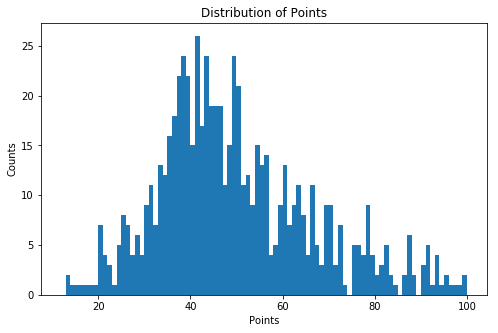

In [4]:
# defines a function to plot histograms
def plot_hist (data, x, binsize, xlabel):
    plt.figure(figsize=[8, 5])
    bins = np.arange(data[x].min()-binsize, data[x].max()+binsize, binsize)
    plt.hist(data = data, x = x, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel('Counts');
    
plot_hist(data=df, x='pts', binsize=1, xlabel='Points')
plt.title('Distribution of Points');

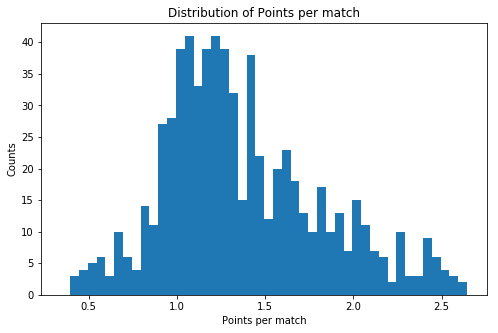

In [5]:
plot_hist(data=df, x='pts_per_match', binsize=0.05, xlabel='Points per match')
plt.title('Distribution of Points per match');

## Distribution of wins and scored

> The distribution of both wins and goals scored is skewed to the right, most teams score between 25 and 60 goals per year, while the best teams score over 100 goals and the same goes for wins, most teams win between 7 and 17 matches but the best teams win around 30 matches.

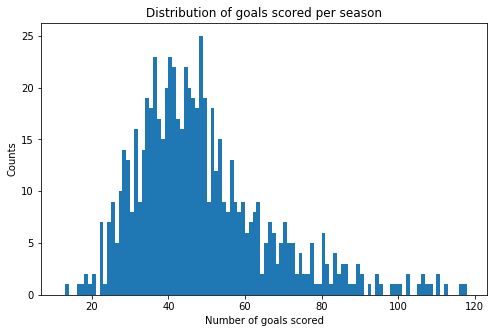

In [6]:
plot_hist(data=df, x='scored', binsize=1, xlabel='Number of goals scored')
plt.title('Distribution of goals scored per season');

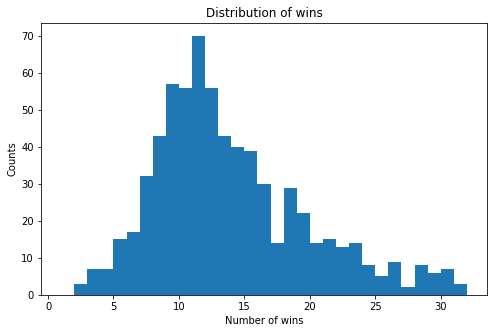

In [7]:
plot_hist(data=df, x='wins', binsize=1, xlabel='Number of wins')
plt.title('Distribution of wins');

## Factors that affect the points a team gets

> The most important factor that gives a team more points is wins, the more a team wins, the more points it gets and the more it loses, the less point it gets.

> Another important factor is goals scored, the more goals the team scores the more it is likely to win and the more it is likely to win, the more points it gets.

> Passes closes to the opposition box is another important factor; it the team has more passes close to the opponent's goal, then the team is more likely to score and win and get points but if the team allow the opponent to pass the ball close to its goal then it is more likely to lose

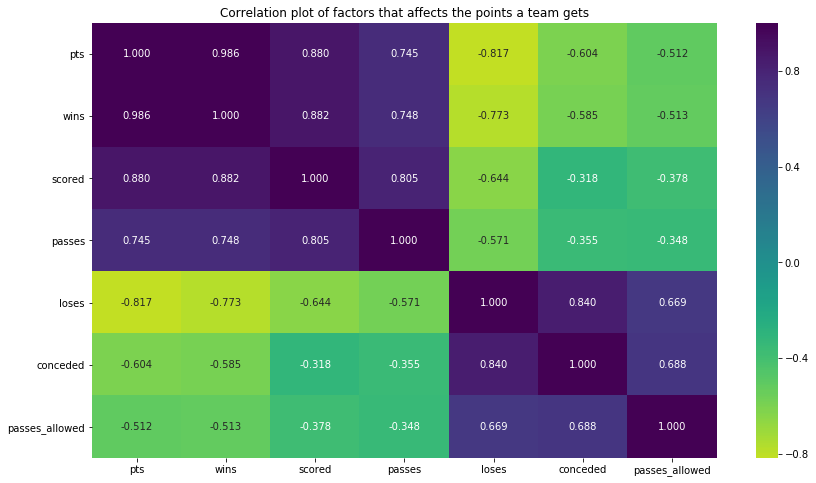

In [8]:
numeric = ['pts', 'wins', 'scored', 'passes', 'loses', 'conceded', 'passes_allowed']
plt.figure(figsize = [14, 8])
sb.heatmap(df[numeric].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r', center = 0)
plt.title('Correlation plot of factors that affects the points a team gets');

## Which league has more passes close to the opponent's goal?

It is interesting that the EPL has more passes close to the opponents goal than the other leagues, one might have expected La liga to come up tops here because Barcelona who play in La Liga are know for their passing but it turns out that a team does not make a league.

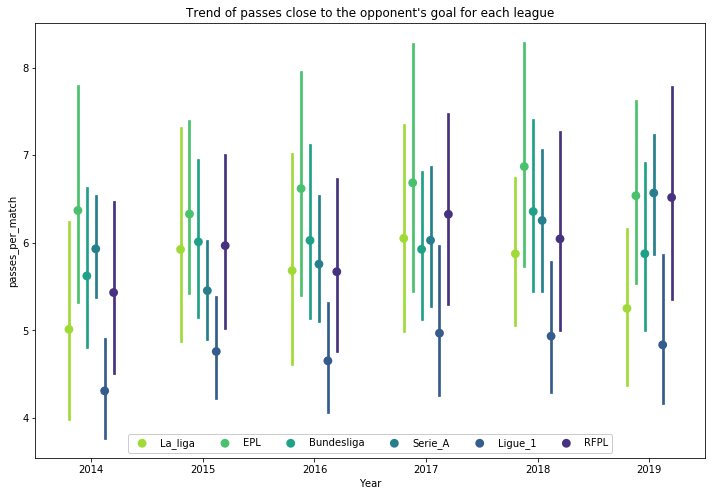

In [9]:
fig = plt.figure(figsize = [12,8])
ax = sb.pointplot(data = df, x = 'Year', y = 'passes_per_match', hue = 'League',
           palette = 'viridis_r', linestyles = '', dodge = 0.4)
ax.legend(loc=8, ncol=7, framealpha=1)
plt.title('Trend of passes close to the opponent\'s goal for each league' );